In [ ]:
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(tensorflow.keras.__version__)
print(sys.version)

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

print("Cuda Availability: ", tf.test.is_built_with_cuda())

2.10.1
2.10.0
3.8.15 (default, Nov  4 2022, 15:16:59) [MSC v.1916 64 bit (AMD64)]
GPU is available
Cuda Availability:  True


In [ ]:
from keras import backend as K, initializers, regularizers, constraints
from keras.backend import image_data_format
from keras.backend import _preprocess_conv2d_input, _preprocess_padding
from tensorflow.keras.layers import InputSpec
import tensorflow as tf
from keras.layers import Conv2D
from keras.utils import conv_utils

In [ ]:
from keras.layers import Conv2D, DepthwiseConv2D, Dense, GlobalAveragePooling2D, MaxPooling2D, Input, BatchNormalization, \
     add, Activation
from keras.regularizers import l2
from keras.models import Model

In [ ]:
def LCNN_BFF(input_shape, num_classes):
    input_0 = Input(shape=input_shape)
    # Group 1
    out1 = Conv2D(32, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(input_0)
    out1 = BatchNormalization()(out1)
    out1 = Activation('relu')(out1)
    out1 = Conv2D(32, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(out1)
    out1 = BatchNormalization()(out1)
    out1 = Activation('relu')(out1)
    out1 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(out1)

    # Group 2
    out2 = Conv2D(64, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(out2)
    out2 = BatchNormalization()(out2)
    out2 = Activation('relu')(out2)
    out2 = Conv2D(64, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(out2)
    out2 = BatchNormalization()(out2)
    out2 = Activation('relu')(out2)
    out2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(out2)

    # Group 3
    out3 = Conv2D(128, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(out3)
    out3 = BatchNormalization()(out3)
    out3 = Activation('relu')(out3)
    out3 = Conv2D(128, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(out3)
    out3 = BatchNormalization()(out3)
    out3 = Activation('relu')(out3)
    out3 = Conv2D(128, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(out3)
    out3 = BatchNormalization()(out3)
    out3 = Activation('relu')(out3)
    out3 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(out3)

    # Group 4 32*32
    out4 = Conv2D(128, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(out3)
    out4 = BatchNormalization()(out4)
    out4 = Activation('relu')(out4)
    out4 = Conv2D(128, (3, 3), padding='same', strides=2, kernel_regularizer=l2(5e-4), use_bias=False)(out4)
    q = BatchNormalization()(out4)


    x = Conv2D(128, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(a)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', strides=2, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    w = BatchNormalization()(x)

    x = add([q, w])
    e = Activation('relu')(x)

    # Group 5 16*16
    x = Conv2D(256, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(e)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=2, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    r = BatchNormalization()(x)

    x = Conv2D(256, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(e)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=2, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    t = BatchNormalization()(x)

    x = add([r, t])
    e = Activation('relu')(x)

    # Group 6 8*8
    x = Conv2D(256, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(e)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=2, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    q = BatchNormalization()(x)

    x = Conv2D(256, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(e)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=2, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    w = BatchNormalization()(x)

    x = add([q, w])
    e = Activation('relu')(x)

    # Group 7 4*4
    x = Conv2D(256, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(e)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    r = BatchNormalization()(x)

    x = Conv2D(256, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(e)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    t = BatchNormalization()(x)

    x = add([r, t])
    e = Activation('relu')(x)

    # Group 8 4*4
    x = Conv2D(512, (1, 1), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(e)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', strides=1, kernel_regularizer=l2(5e-4), use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Group 9 full connection
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(input_0, x)
    return model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger
from keras.optimizers import RMSprop, Adam, SGD

In [ ]:
trainset_dir = 'data/train/NWPU45/'
valset_dir = 'data/test/NWPU45/'
num_classes = 45
learning_rate = 1e-2
momentum = 0.9
batch_size = 16
input_shape = (256, 256, 3)

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 60,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    trainset_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    valset_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical')

optim = SGD(learning_rate=learning_rate, momentum=momentum)

Found 25200 images belonging to 45 classes.
Found 6300 images belonging to 45 classes.


In [ ]:
model = LCNN_BFF(input_shape, num_classes)

model.compile(optimizer=optim, loss='categorical_crossentropy',
              metrics=['acc'])

csv_path = 'result/XXX.csv'
save_weights_path = './result/model-weight-ep-{epoch:02d}-val_loss-{val_loss:.4f}-val_acc-{val_acc:.4f}.h5'
#You can modify the path by yourself

checkpoint = ModelCheckpoint(save_weights_path, monitor='val_acc', verbose=1, 
                             save_weights_only=True, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=32, verbose=1)
# logging = TensorBoard(log_dir=log_dir, batch_size=batch_size)
csvlogger = CSVLogger(csv_path, append=True)

callbacks = [checkpoint, reduce_lr, csvlogger]

num_epochs = 1000

model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=num_epochs,
                    verbose=1, 
                    callbacks=callbacks, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator),
                    workers=1)
# fit_generator(self, generator, steps_per_epoch, epochs=1, verbose=1, 
#               callbacks=None, validation_data=None, validation_steps=None, 
#               class_weight=None, max_q_size=10, workers=1, pickle_safe=False, initial_epoch=0)

Epoch 1/1000
1575/1575 [==============================] - ETA: 0s - loss: 6.3864 - acc: 0.1471
Epoch 1: val_acc improved from -inf to 0.15635, saving model to ./result\model-weight-ep-01-val_loss-6.1880-val_acc-0.1563.h5
1575/1575 [==============================] - 574s 362ms/step - loss: 6.3864 - acc: 0.1471 - val_loss: 6.1880 - val_acc: 0.1563 - lr: 0.0100
Epoch 2/1000
1575/1575 [==============================] - ETA: 0s - loss: 4.9706 - acc: 0.2867
Epoch 2: val_acc improved from 0.15635 to 0.29206, saving model to ./result\model-weight-ep-02-val_loss-4.7732-val_acc-0.2921.h5
1575/1575 [==============================] - 375s 238ms/step - loss: 4.9706 - acc: 0.2867 - val_loss: 4.7732 - val_acc: 0.2921 - lr: 0.0100
Epoch 3/1000
1575/1575 [==============================] - ETA: 0s - loss: 4.0519 - acc: 0.3813
Epoch 3: val_acc improved from 0.29206 to 0.38016, saving model to ./result\model-weight-ep-03-val_loss-3.9653-val_acc-0.3802.h5
1575/1575 [==============================] - 376s 2

Epoch 28/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.5097 - acc: 0.7472
Epoch 28: val_acc did not improve from 0.72841
1575/1575 [==============================] - 354s 225ms/step - loss: 1.5097 - acc: 0.7472 - val_loss: 3.5623 - val_acc: 0.4322 - lr: 0.0100
Epoch 29/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.5073 - acc: 0.7496
Epoch 29: val_acc did not improve from 0.72841
1575/1575 [==============================] - 371s 235ms/step - loss: 1.5073 - acc: 0.7496 - val_loss: 2.3913 - val_acc: 0.5717 - lr: 0.0100
Epoch 30/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4966 - acc: 0.7504
Epoch 30: val_acc did not improve from 0.72841
1575/1575 [==============================] - 361s 229ms/step - loss: 1.4966 - acc: 0.7504 - val_loss: 1.7183 - val_acc: 0.7075 - lr: 0.0100
Epoch 31/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4938 - acc: 0.7560
Epoch 31: val_acc did not improve from 0.72841
1575/157

1575/1575 [==============================] - 362s 230ms/step - loss: 1.4430 - acc: 0.7849 - val_loss: 1.7991 - val_acc: 0.7297 - lr: 0.0100
Epoch 57/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4341 - acc: 0.7869
Epoch 57: val_acc did not improve from 0.76698
1575/1575 [==============================] - 369s 234ms/step - loss: 1.4341 - acc: 0.7869 - val_loss: 1.7194 - val_acc: 0.7230 - lr: 0.0100
Epoch 58/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4465 - acc: 0.7868
Epoch 58: val_acc did not improve from 0.76698
1575/1575 [==============================] - 358s 227ms/step - loss: 1.4465 - acc: 0.7868 - val_loss: 1.8382 - val_acc: 0.7167 - lr: 0.0100
Epoch 59/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4370 - acc: 0.7881
Epoch 59: val_acc did not improve from 0.76698
1575/1575 [==============================] - 363s 230ms/step - loss: 1.4370 - acc: 0.7881 - val_loss: 1.6382 - val_acc: 0.7513 - lr: 0.0100
Epoch 60/10

Epoch 85/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4212 - acc: 0.8035
Epoch 85: val_acc did not improve from 0.79476
1575/1575 [==============================] - 373s 236ms/step - loss: 1.4212 - acc: 0.8035 - val_loss: 1.5199 - val_acc: 0.7837 - lr: 0.0100
Epoch 86/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4273 - acc: 0.8011
Epoch 86: val_acc did not improve from 0.79476
1575/1575 [==============================] - 378s 240ms/step - loss: 1.4273 - acc: 0.8011 - val_loss: 2.5183 - val_acc: 0.5359 - lr: 0.0100
Epoch 87/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4381 - acc: 0.8013
Epoch 87: val_acc did not improve from 0.79476
1575/1575 [==============================] - 382s 242ms/step - loss: 1.4381 - acc: 0.8013 - val_loss: 1.9177 - val_acc: 0.6956 - lr: 0.0100
Epoch 88/1000
1575/1575 [==============================] - ETA: 0s - loss: 1.4236 - acc: 0.8033
Epoch 88: val_acc did not improve from 0.79476
1575/157

1575/1575 [==============================] - 373s 237ms/step - loss: 0.9940 - acc: 0.9125 - val_loss: 0.9707 - val_acc: 0.9179 - lr: 1.0000e-03
Epoch 113/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.9630 - acc: 0.9139
Epoch 113: val_acc improved from 0.92032 to 0.92095, saving model to ./result\model-weight-ep-113-val_loss-0.9383-val_acc-0.9210.h5
1575/1575 [==============================] - 377s 239ms/step - loss: 0.9630 - acc: 0.9139 - val_loss: 0.9383 - val_acc: 0.9210 - lr: 1.0000e-03
Epoch 114/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.9290 - acc: 0.9193
Epoch 114: val_acc improved from 0.92095 to 0.92508, saving model to ./result\model-weight-ep-114-val_loss-0.9051-val_acc-0.9251.h5
1575/1575 [==============================] - 378s 240ms/step - loss: 0.9290 - acc: 0.9193 - val_loss: 0.9051 - val_acc: 0.9251 - lr: 1.0000e-03
Epoch 115/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.9041 - acc: 0.9188
Epoch 115: va

Epoch 139/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.5345 - acc: 0.9422
Epoch 139: val_acc did not improve from 0.93286
1575/1575 [==============================] - 374s 237ms/step - loss: 0.5345 - acc: 0.9422 - val_loss: 0.6380 - val_acc: 0.9159 - lr: 1.0000e-03
Epoch 140/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.5263 - acc: 0.9440
Epoch 140: val_acc improved from 0.93286 to 0.93429, saving model to ./result\model-weight-ep-140-val_loss-0.5679-val_acc-0.9343.h5
1575/1575 [==============================] - 379s 240ms/step - loss: 0.5263 - acc: 0.9440 - val_loss: 0.5679 - val_acc: 0.9343 - lr: 1.0000e-03
Epoch 141/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.5242 - acc: 0.9421
Epoch 141: val_acc did not improve from 0.93429
1575/1575 [==============================] - 389s 247ms/step - loss: 0.5242 - acc: 0.9421 - val_loss: 0.6583 - val_acc: 0.9103 - lr: 1.0000e-03
Epoch 142/1000
1575/1575 [=======================

1575/1575 [==============================] - ETA: 0s - loss: 0.4431 - acc: 0.9424
Epoch 167: val_acc did not improve from 0.93429
1575/1575 [==============================] - 367s 233ms/step - loss: 0.4431 - acc: 0.9424 - val_loss: 0.5604 - val_acc: 0.9133 - lr: 1.0000e-03
Epoch 168/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.4421 - acc: 0.9426
Epoch 168: val_acc did not improve from 0.93429
1575/1575 [==============================] - 381s 242ms/step - loss: 0.4421 - acc: 0.9426 - val_loss: 0.6118 - val_acc: 0.9043 - lr: 1.0000e-03
Epoch 169/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.4398 - acc: 0.9437
Epoch 169: val_acc did not improve from 0.93429
1575/1575 [==============================] - 375s 238ms/step - loss: 0.4398 - acc: 0.9437 - val_loss: 0.5813 - val_acc: 0.9092 - lr: 1.0000e-03
Epoch 170/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.4445 - acc: 0.9411
Epoch 170: val_acc did not improve from 0.93429
157

1575/1575 [==============================] - 355s 225ms/step - loss: 0.4212 - acc: 0.9476 - val_loss: 0.5761 - val_acc: 0.9137 - lr: 1.0000e-03
Epoch 196/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.4274 - acc: 0.9466
Epoch 196: val_acc did not improve from 0.93429
1575/1575 [==============================] - 357s 226ms/step - loss: 0.4274 - acc: 0.9466 - val_loss: 0.5337 - val_acc: 0.9259 - lr: 1.0000e-03
Epoch 197/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.4281 - acc: 0.9460
Epoch 197: val_acc did not improve from 0.93429
1575/1575 [==============================] - 361s 229ms/step - loss: 0.4281 - acc: 0.9460 - val_loss: 0.7251 - val_acc: 0.8860 - lr: 1.0000e-03
Epoch 198/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.4330 - acc: 0.9440
Epoch 198: val_acc did not improve from 0.93429
1575/1575 [==============================] - 371s 235ms/step - loss: 0.4330 - acc: 0.9440 - val_loss: 0.6196 - val_acc: 0.9021 - lr: 

1575/1575 [==============================] - 356s 226ms/step - loss: 0.3196 - acc: 0.9811 - val_loss: 0.4451 - val_acc: 0.9495 - lr: 1.0000e-04
Epoch 223/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.3179 - acc: 0.9821
Epoch 223: val_acc improved from 0.94952 to 0.95032, saving model to ./result\model-weight-ep-223-val_loss-0.4452-val_acc-0.9503.h5
1575/1575 [==============================] - 361s 229ms/step - loss: 0.3179 - acc: 0.9821 - val_loss: 0.4452 - val_acc: 0.9503 - lr: 1.0000e-04
Epoch 224/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.3169 - acc: 0.9823
Epoch 224: val_acc improved from 0.95032 to 0.95127, saving model to ./result\model-weight-ep-224-val_loss-0.4371-val_acc-0.9513.h5
1575/1575 [==============================] - 367s 233ms/step - loss: 0.3169 - acc: 0.9823 - val_loss: 0.4371 - val_acc: 0.9513 - lr: 1.0000e-04
Epoch 225/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.3097 - acc: 0.9835
Epoch 225: va

Epoch 250/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2770 - acc: 0.9887
Epoch 250: val_acc did not improve from 0.95143
1575/1575 [==============================] - 363s 230ms/step - loss: 0.2770 - acc: 0.9887 - val_loss: 0.4311 - val_acc: 0.9492 - lr: 1.0000e-04
Epoch 251/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2768 - acc: 0.9872
Epoch 251: val_acc did not improve from 0.95143
1575/1575 [==============================] - 358s 227ms/step - loss: 0.2768 - acc: 0.9872 - val_loss: 0.4231 - val_acc: 0.9514 - lr: 1.0000e-04
Epoch 252/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2731 - acc: 0.9898
Epoch 252: val_acc improved from 0.95143 to 0.95238, saving model to ./result\model-weight-ep-252-val_loss-0.4176-val_acc-0.9524.h5
1575/1575 [==============================] - 362s 230ms/step - loss: 0.2731 - acc: 0.9898 - val_loss: 0.4176 - val_acc: 0.9524 - lr: 1.0000e-04
Epoch 253/1000
1575/1575 [=======================

Epoch 278/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2462 - acc: 0.9925
Epoch 278: val_acc did not improve from 0.95270
1575/1575 [==============================] - 372s 236ms/step - loss: 0.2462 - acc: 0.9925 - val_loss: 0.4173 - val_acc: 0.9492 - lr: 1.0000e-04
Epoch 279/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2455 - acc: 0.9922
Epoch 279: val_acc did not improve from 0.95270
1575/1575 [==============================] - 360s 228ms/step - loss: 0.2455 - acc: 0.9922 - val_loss: 0.4063 - val_acc: 0.9510 - lr: 1.0000e-04
Epoch 280/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2436 - acc: 0.9923
Epoch 280: val_acc did not improve from 0.95270
1575/1575 [==============================] - 362s 230ms/step - loss: 0.2436 - acc: 0.9923 - val_loss: 0.4071 - val_acc: 0.9510 - lr: 1.0000e-04
Epoch 281/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2450 - acc: 0.9917
Epoch 281: val_acc did not improve f

1575/1575 [==============================] - 356s 226ms/step - loss: 0.2234 - acc: 0.9938 - val_loss: 0.3927 - val_acc: 0.9530 - lr: 1.0000e-04
Epoch 307/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2219 - acc: 0.9941
Epoch 307: val_acc improved from 0.95302 to 0.95317, saving model to ./result\model-weight-ep-307-val_loss-0.3934-val_acc-0.9532.h5
1575/1575 [==============================] - 373s 237ms/step - loss: 0.2219 - acc: 0.9941 - val_loss: 0.3934 - val_acc: 0.9532 - lr: 1.0000e-04
Epoch 308/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2241 - acc: 0.9932
Epoch 308: val_acc did not improve from 0.95317
1575/1575 [==============================] - 370s 235ms/step - loss: 0.2241 - acc: 0.9932 - val_loss: 0.3925 - val_acc: 0.9513 - lr: 1.0000e-04
Epoch 309/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2218 - acc: 0.9943
Epoch 309: val_acc did not improve from 0.95317
1575/1575 [==============================] - 357s

Epoch 335/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2031 - acc: 0.9949
Epoch 335: val_acc did not improve from 0.95317
1575/1575 [==============================] - 368s 234ms/step - loss: 0.2031 - acc: 0.9949 - val_loss: 0.3816 - val_acc: 0.9510 - lr: 1.0000e-04
Epoch 336/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2032 - acc: 0.9944
Epoch 336: val_acc did not improve from 0.95317
1575/1575 [==============================] - 360s 228ms/step - loss: 0.2032 - acc: 0.9944 - val_loss: 0.3935 - val_acc: 0.9502 - lr: 1.0000e-04
Epoch 337/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2039 - acc: 0.9942
Epoch 337: val_acc did not improve from 0.95317
1575/1575 [==============================] - 365s 232ms/step - loss: 0.2039 - acc: 0.9942 - val_loss: 0.3824 - val_acc: 0.9513 - lr: 1.0000e-04
Epoch 338/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.2024 - acc: 0.9942
Epoch 338: val_acc did not improve f

1575/1575 [==============================] - ETA: 0s - loss: 0.1871 - acc: 0.9951
Epoch 363: val_acc did not improve from 0.95397
1575/1575 [==============================] - 371s 236ms/step - loss: 0.1871 - acc: 0.9951 - val_loss: 0.3800 - val_acc: 0.9484 - lr: 1.0000e-04
Epoch 364/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1884 - acc: 0.9948
Epoch 364: val_acc did not improve from 0.95397
1575/1575 [==============================] - 364s 231ms/step - loss: 0.1884 - acc: 0.9948 - val_loss: 0.3837 - val_acc: 0.9498 - lr: 1.0000e-04
Epoch 365/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1869 - acc: 0.9951
Epoch 365: val_acc did not improve from 0.95397
1575/1575 [==============================] - 368s 233ms/step - loss: 0.1869 - acc: 0.9951 - val_loss: 0.3830 - val_acc: 0.9495 - lr: 1.0000e-04
Epoch 366/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1845 - acc: 0.9956
Epoch 366: val_acc did not improve from 0.95397
157

1575/1575 [==============================] - 365s 231ms/step - loss: 0.1717 - acc: 0.9958 - val_loss: 0.3649 - val_acc: 0.9505 - lr: 1.0000e-04
Epoch 392/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1718 - acc: 0.9954
Epoch 392: val_acc did not improve from 0.95397
1575/1575 [==============================] - 377s 239ms/step - loss: 0.1718 - acc: 0.9954 - val_loss: 0.3605 - val_acc: 0.9498 - lr: 1.0000e-04
Epoch 393/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1701 - acc: 0.9962
Epoch 393: val_acc did not improve from 0.95397
1575/1575 [==============================] - 362s 230ms/step - loss: 0.1701 - acc: 0.9962 - val_loss: 0.3729 - val_acc: 0.9495 - lr: 1.0000e-04
Epoch 394/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1735 - acc: 0.9940
Epoch 394: val_acc did not improve from 0.95397
1575/1575 [==============================] - 370s 235ms/step - loss: 0.1735 - acc: 0.9940 - val_loss: 0.3625 - val_acc: 0.9492 - lr: 

Epoch 420/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1600 - acc: 0.9953
Epoch 420: val_acc did not improve from 0.95397
1575/1575 [==============================] - 362s 230ms/step - loss: 0.1600 - acc: 0.9953 - val_loss: 0.3669 - val_acc: 0.9497 - lr: 1.0000e-04
Epoch 421/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1614 - acc: 0.9950
Epoch 421: val_acc did not improve from 0.95397
1575/1575 [==============================] - 371s 235ms/step - loss: 0.1614 - acc: 0.9950 - val_loss: 0.3767 - val_acc: 0.9483 - lr: 1.0000e-04
Epoch 422/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1608 - acc: 0.9952
Epoch 422: val_acc did not improve from 0.95397
1575/1575 [==============================] - 372s 236ms/step - loss: 0.1608 - acc: 0.9952 - val_loss: 0.3727 - val_acc: 0.9513 - lr: 1.0000e-04
Epoch 423/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1580 - acc: 0.9960
Epoch 423: val_acc did not improve f

1575/1575 [==============================] - 363s 230ms/step - loss: 0.1461 - acc: 0.9964 - val_loss: 0.3485 - val_acc: 0.9514 - lr: 1.0000e-04
Epoch 449/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1469 - acc: 0.9959
Epoch 449: val_acc did not improve from 0.95397
1575/1575 [==============================] - 374s 237ms/step - loss: 0.1469 - acc: 0.9959 - val_loss: 0.3517 - val_acc: 0.9503 - lr: 1.0000e-04
Epoch 450/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1491 - acc: 0.9953
Epoch 450: val_acc did not improve from 0.95397
1575/1575 [==============================] - 365s 232ms/step - loss: 0.1491 - acc: 0.9953 - val_loss: 0.3596 - val_acc: 0.9494 - lr: 1.0000e-04
Epoch 451/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1458 - acc: 0.9962
Epoch 451: val_acc did not improve from 0.95397
1575/1575 [==============================] - 367s 233ms/step - loss: 0.1458 - acc: 0.9962 - val_loss: 0.3742 - val_acc: 0.9460 - lr: 

Epoch 477/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1395 - acc: 0.9952
Epoch 477: val_acc did not improve from 0.95397
1575/1575 [==============================] - 356s 226ms/step - loss: 0.1395 - acc: 0.9952 - val_loss: 0.3501 - val_acc: 0.9497 - lr: 1.0000e-04
Epoch 478/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1376 - acc: 0.9959
Epoch 478: val_acc did not improve from 0.95397
1575/1575 [==============================] - 374s 237ms/step - loss: 0.1376 - acc: 0.9959 - val_loss: 0.3399 - val_acc: 0.9486 - lr: 1.0000e-04
Epoch 479/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1374 - acc: 0.9958
Epoch 479: val_acc did not improve from 0.95397
1575/1575 [==============================] - 368s 234ms/step - loss: 0.1374 - acc: 0.9958 - val_loss: 0.3434 - val_acc: 0.9494 - lr: 1.0000e-04
Epoch 480/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1350 - acc: 0.9963
Epoch 480: val_acc did not improve f

1575/1575 [==============================] - ETA: 0s - loss: 0.1319 - acc: 0.9952
Epoch 505: val_acc did not improve from 0.95413
1575/1575 [==============================] - 366s 233ms/step - loss: 0.1319 - acc: 0.9952 - val_loss: 0.3467 - val_acc: 0.9465 - lr: 1.0000e-04
Epoch 506/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1292 - acc: 0.9956
Epoch 506: val_acc did not improve from 0.95413
1575/1575 [==============================] - 391s 248ms/step - loss: 0.1292 - acc: 0.9956 - val_loss: 0.3287 - val_acc: 0.9503 - lr: 1.0000e-04
Epoch 507/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1295 - acc: 0.9954
Epoch 507: val_acc did not improve from 0.95413
1575/1575 [==============================] - 358s 228ms/step - loss: 0.1295 - acc: 0.9954 - val_loss: 0.3402 - val_acc: 0.9489 - lr: 1.0000e-04
Epoch 508/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1303 - acc: 0.9954
Epoch 508: val_acc did not improve from 0.95413
157

1575/1575 [==============================] - 374s 237ms/step - loss: 0.1210 - acc: 0.9958 - val_loss: 0.3282 - val_acc: 0.9508 - lr: 1.0000e-04
Epoch 534/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1220 - acc: 0.9959
Epoch 534: val_acc did not improve from 0.95413
1575/1575 [==============================] - 369s 234ms/step - loss: 0.1220 - acc: 0.9959 - val_loss: 0.3543 - val_acc: 0.9456 - lr: 1.0000e-04
Epoch 535/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1220 - acc: 0.9957
Epoch 535: val_acc did not improve from 0.95413
1575/1575 [==============================] - 369s 234ms/step - loss: 0.1220 - acc: 0.9957 - val_loss: 0.3367 - val_acc: 0.9483 - lr: 1.0000e-04
Epoch 536/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1212 - acc: 0.9958
Epoch 536: val_acc did not improve from 0.95413
1575/1575 [==============================] - 377s 239ms/step - loss: 0.1212 - acc: 0.9958 - val_loss: 0.3307 - val_acc: 0.9478 - lr: 

Epoch 562/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1195 - acc: 0.9938
Epoch 562: val_acc did not improve from 0.95413
1575/1575 [==============================] - 366s 232ms/step - loss: 0.1195 - acc: 0.9938 - val_loss: 0.3465 - val_acc: 0.9454 - lr: 1.0000e-04
Epoch 563/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1125 - acc: 0.9963
Epoch 563: val_acc did not improve from 0.95413
1575/1575 [==============================] - 375s 238ms/step - loss: 0.1125 - acc: 0.9963 - val_loss: 0.3397 - val_acc: 0.9467 - lr: 1.0000e-04
Epoch 564/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1136 - acc: 0.9959
Epoch 564: val_acc did not improve from 0.95413
1575/1575 [==============================] - 371s 236ms/step - loss: 0.1136 - acc: 0.9959 - val_loss: 0.3478 - val_acc: 0.9432 - lr: 1.0000e-04
Epoch 565/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1139 - acc: 0.9959
Epoch 565: val_acc did not improve f

1575/1575 [==============================] - ETA: 0s - loss: 0.1036 - acc: 0.9977
Epoch 590: val_acc did not improve from 0.95413
1575/1575 [==============================] - 370s 235ms/step - loss: 0.1036 - acc: 0.9977 - val_loss: 0.3130 - val_acc: 0.9527 - lr: 1.0000e-05
Epoch 591/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1044 - acc: 0.9974
Epoch 591: val_acc did not improve from 0.95413
1575/1575 [==============================] - 369s 234ms/step - loss: 0.1044 - acc: 0.9974 - val_loss: 0.3130 - val_acc: 0.9532 - lr: 1.0000e-05
Epoch 592/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1031 - acc: 0.9980
Epoch 592: val_acc did not improve from 0.95413
1575/1575 [==============================] - 363s 231ms/step - loss: 0.1031 - acc: 0.9980 - val_loss: 0.3135 - val_acc: 0.9522 - lr: 1.0000e-05
Epoch 593/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1021 - acc: 0.9986
Epoch 593: val_acc did not improve from 0.95413
157

1575/1575 [==============================] - ETA: 0s - loss: 0.1001 - acc: 0.9988
Epoch 618: val_acc did not improve from 0.95429
1575/1575 [==============================] - 366s 232ms/step - loss: 0.1001 - acc: 0.9988 - val_loss: 0.3091 - val_acc: 0.9543 - lr: 1.0000e-05
Epoch 619/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.1011 - acc: 0.9985
Epoch 619: val_acc improved from 0.95429 to 0.95444, saving model to ./result\model-weight-ep-619-val_loss-0.3054-val_acc-0.9544.h5
1575/1575 [==============================] - 361s 229ms/step - loss: 0.1011 - acc: 0.9985 - val_loss: 0.3054 - val_acc: 0.9544 - lr: 1.0000e-05
Epoch 620/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0994 - acc: 0.9992
Epoch 620: val_acc did not improve from 0.95444
1575/1575 [==============================] - 369s 234ms/step - loss: 0.0994 - acc: 0.9992 - val_loss: 0.3087 - val_acc: 0.9537 - lr: 1.0000e-05
Epoch 621/1000
1575/1575 [==============================] - ETA:

Epoch 646/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0990 - acc: 0.9989
Epoch 646: val_acc did not improve from 0.95508
1575/1575 [==============================] - 361s 229ms/step - loss: 0.0990 - acc: 0.9989 - val_loss: 0.3118 - val_acc: 0.9537 - lr: 1.0000e-05
Epoch 647/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0994 - acc: 0.9987
Epoch 647: val_acc did not improve from 0.95508
1575/1575 [==============================] - 371s 235ms/step - loss: 0.0994 - acc: 0.9987 - val_loss: 0.3123 - val_acc: 0.9521 - lr: 1.0000e-05
Epoch 648/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0988 - acc: 0.9988
Epoch 648: val_acc did not improve from 0.95508
1575/1575 [==============================] - 362s 230ms/step - loss: 0.0988 - acc: 0.9988 - val_loss: 0.3126 - val_acc: 0.9522 - lr: 1.0000e-05
Epoch 649/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0993 - acc: 0.9988
Epoch 649: val_acc did not improve f

1575/1575 [==============================] - ETA: 0s - loss: 0.0987 - acc: 0.9988
Epoch 674: val_acc did not improve from 0.95508
1575/1575 [==============================] - 372s 236ms/step - loss: 0.0987 - acc: 0.9988 - val_loss: 0.3087 - val_acc: 0.9530 - lr: 1.0000e-06
Epoch 675/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0985 - acc: 0.9988
Epoch 675: val_acc did not improve from 0.95508
1575/1575 [==============================] - 363s 231ms/step - loss: 0.0985 - acc: 0.9988 - val_loss: 0.3090 - val_acc: 0.9535 - lr: 1.0000e-06
Epoch 676/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9988
Epoch 676: val_acc did not improve from 0.95508
1575/1575 [==============================] - 367s 233ms/step - loss: 0.0984 - acc: 0.9988 - val_loss: 0.3098 - val_acc: 0.9537 - lr: 1.0000e-06
Epoch 677/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0992 - acc: 0.9984
Epoch 677: val_acc did not improve from 0.95508
157

1575/1575 [==============================] - ETA: 0s - loss: 0.0981 - acc: 0.9988
Epoch 702: val_acc did not improve from 0.95508
1575/1575 [==============================] - 364s 231ms/step - loss: 0.0981 - acc: 0.9988 - val_loss: 0.3082 - val_acc: 0.9527 - lr: 1.0000e-07
Epoch 703/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0974 - acc: 0.9993
Epoch 703: val_acc did not improve from 0.95508
1575/1575 [==============================] - 371s 236ms/step - loss: 0.0974 - acc: 0.9993 - val_loss: 0.3100 - val_acc: 0.9532 - lr: 1.0000e-07
Epoch 704/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0987 - acc: 0.9989
Epoch 704: val_acc did not improve from 0.95508
1575/1575 [==============================] - 373s 237ms/step - loss: 0.0987 - acc: 0.9989 - val_loss: 0.3090 - val_acc: 0.9530 - lr: 1.0000e-07
Epoch 705/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9987
Epoch 705: val_acc did not improve from 0.95508
157

1575/1575 [==============================] - ETA: 0s - loss: 0.0980 - acc: 0.9989
Epoch 730: val_acc did not improve from 0.95508
1575/1575 [==============================] - 363s 230ms/step - loss: 0.0980 - acc: 0.9989 - val_loss: 0.3091 - val_acc: 0.9524 - lr: 1.0000e-08
Epoch 731/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0982 - acc: 0.9989
Epoch 731: val_acc did not improve from 0.95508
1575/1575 [==============================] - 370s 235ms/step - loss: 0.0982 - acc: 0.9989 - val_loss: 0.3088 - val_acc: 0.9535 - lr: 1.0000e-08
Epoch 732/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0983 - acc: 0.9987
Epoch 732: val_acc did not improve from 0.95508
1575/1575 [==============================] - 364s 231ms/step - loss: 0.0983 - acc: 0.9987 - val_loss: 0.3094 - val_acc: 0.9529 - lr: 1.0000e-08
Epoch 733/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9988
Epoch 733: val_acc did not improve from 0.95508
157

1575/1575 [==============================] - ETA: 0s - loss: 0.0982 - acc: 0.9989
Epoch 758: val_acc did not improve from 0.95508
1575/1575 [==============================] - 364s 231ms/step - loss: 0.0982 - acc: 0.9989 - val_loss: 0.3101 - val_acc: 0.9533 - lr: 1.0000e-09
Epoch 759/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0981 - acc: 0.9987
Epoch 759: val_acc did not improve from 0.95508
1575/1575 [==============================] - 361s 229ms/step - loss: 0.0981 - acc: 0.9987 - val_loss: 0.3082 - val_acc: 0.9538 - lr: 1.0000e-09
Epoch 760/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0980 - acc: 0.9990
Epoch 760: val_acc did not improve from 0.95508
1575/1575 [==============================] - 366s 233ms/step - loss: 0.0980 - acc: 0.9990 - val_loss: 0.3080 - val_acc: 0.9546 - lr: 1.0000e-09
Epoch 761/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0992 - acc: 0.9987
Epoch 761: val_acc did not improve from 0.95508
157

1575/1575 [==============================] - 361s 229ms/step - loss: 0.0985 - acc: 0.9988 - val_loss: 0.3084 - val_acc: 0.9544 - lr: 1.0000e-09
Epoch 787/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0979 - acc: 0.9989
Epoch 787: val_acc did not improve from 0.95508
1575/1575 [==============================] - 365s 232ms/step - loss: 0.0979 - acc: 0.9989 - val_loss: 0.3087 - val_acc: 0.9535 - lr: 1.0000e-09
Epoch 788/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0980 - acc: 0.9988
Epoch 788: val_acc did not improve from 0.95508
1575/1575 [==============================] - 381s 242ms/step - loss: 0.0980 - acc: 0.9988 - val_loss: 0.3101 - val_acc: 0.9530 - lr: 1.0000e-09
Epoch 789/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0978 - acc: 0.9993
Epoch 789: val_acc did not improve from 0.95508
1575/1575 [==============================] - 375s 238ms/step - loss: 0.0978 - acc: 0.9993 - val_loss: 0.3085 - val_acc: 0.9529 - lr: 

Epoch 815/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0979 - acc: 0.9992
Epoch 815: val_acc did not improve from 0.95508
1575/1575 [==============================] - 383s 243ms/step - loss: 0.0979 - acc: 0.9992 - val_loss: 0.3072 - val_acc: 0.9537 - lr: 1.0000e-10
Epoch 816/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0986 - acc: 0.9986
Epoch 816: val_acc did not improve from 0.95508
1575/1575 [==============================] - 382s 243ms/step - loss: 0.0986 - acc: 0.9986 - val_loss: 0.3093 - val_acc: 0.9532 - lr: 1.0000e-10
Epoch 817/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0982 - acc: 0.9990
Epoch 817: val_acc did not improve from 0.95508
1575/1575 [==============================] - 365s 232ms/step - loss: 0.0982 - acc: 0.9990 - val_loss: 0.3098 - val_acc: 0.9532 - lr: 1.0000e-10
Epoch 818/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0986 - acc: 0.9989
Epoch 818: val_acc did not improve f

1575/1575 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9988
Epoch 843: val_acc did not improve from 0.95508
1575/1575 [==============================] - 364s 231ms/step - loss: 0.0984 - acc: 0.9988 - val_loss: 0.3065 - val_acc: 0.9541 - lr: 1.0000e-11
Epoch 844/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0987 - acc: 0.9988
Epoch 844: val_acc did not improve from 0.95508
1575/1575 [==============================] - 365s 232ms/step - loss: 0.0987 - acc: 0.9988 - val_loss: 0.3072 - val_acc: 0.9535 - lr: 1.0000e-11
Epoch 845/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0993 - acc: 0.9984
Epoch 845: val_acc did not improve from 0.95508
1575/1575 [==============================] - 377s 239ms/step - loss: 0.0993 - acc: 0.9984 - val_loss: 0.3097 - val_acc: 0.9527 - lr: 1.0000e-11
Epoch 846/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0979 - acc: 0.9991
Epoch 846: val_acc did not improve from 0.95508
157

1575/1575 [==============================] - ETA: 0s - loss: 0.0977 - acc: 0.9992
Epoch 871: val_acc did not improve from 0.95508
1575/1575 [==============================] - 366s 232ms/step - loss: 0.0977 - acc: 0.9992 - val_loss: 0.3099 - val_acc: 0.9537 - lr: 1.0000e-12
Epoch 872/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0978 - acc: 0.9990
Epoch 872: val_acc did not improve from 0.95508
1575/1575 [==============================] - 377s 239ms/step - loss: 0.0978 - acc: 0.9990 - val_loss: 0.3068 - val_acc: 0.9543 - lr: 1.0000e-12
Epoch 873/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0979 - acc: 0.9989
Epoch 873: val_acc did not improve from 0.95508
1575/1575 [==============================] - 366s 232ms/step - loss: 0.0979 - acc: 0.9989 - val_loss: 0.3084 - val_acc: 0.9532 - lr: 1.0000e-12
Epoch 874/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0982 - acc: 0.9989
Epoch 874: val_acc did not improve from 0.95508
157

1575/1575 [==============================] - 379s 240ms/step - loss: 0.0982 - acc: 0.9990 - val_loss: 0.3076 - val_acc: 0.9533 - lr: 1.0000e-12
Epoch 900/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0989 - acc: 0.9987
Epoch 900: val_acc did not improve from 0.95508
1575/1575 [==============================] - 371s 235ms/step - loss: 0.0989 - acc: 0.9987 - val_loss: 0.3087 - val_acc: 0.9530 - lr: 1.0000e-12
Epoch 901/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9988
Epoch 901: val_acc did not improve from 0.95508

Epoch 901: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.
1575/1575 [==============================] - 365s 231ms/step - loss: 0.0984 - acc: 0.9988 - val_loss: 0.3102 - val_acc: 0.9533 - lr: 1.0000e-12
Epoch 902/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9989
Epoch 902: val_acc did not improve from 0.95508
1575/1575 [==============================] - 375s 238ms/

Epoch 928/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0983 - acc: 0.9988
Epoch 928: val_acc did not improve from 0.95508
1575/1575 [==============================] - 377s 239ms/step - loss: 0.0983 - acc: 0.9988 - val_loss: 0.3089 - val_acc: 0.9530 - lr: 1.0000e-13
Epoch 929/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0987 - acc: 0.9988
Epoch 929: val_acc did not improve from 0.95508
1575/1575 [==============================] - 377s 239ms/step - loss: 0.0987 - acc: 0.9988 - val_loss: 0.3091 - val_acc: 0.9535 - lr: 1.0000e-13
Epoch 930/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0989 - acc: 0.9986
Epoch 930: val_acc did not improve from 0.95508
1575/1575 [==============================] - 361s 229ms/step - loss: 0.0989 - acc: 0.9986 - val_loss: 0.3092 - val_acc: 0.9524 - lr: 1.0000e-13
Epoch 931/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0987 - acc: 0.9987
Epoch 931: val_acc did not improve f

1575/1575 [==============================] - ETA: 0s - loss: 0.0991 - acc: 0.9987
Epoch 956: val_acc did not improve from 0.95508
1575/1575 [==============================] - 375s 238ms/step - loss: 0.0991 - acc: 0.9987 - val_loss: 0.3072 - val_acc: 0.9541 - lr: 1.0000e-14
Epoch 957/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0988 - acc: 0.9987
Epoch 957: val_acc did not improve from 0.95508
1575/1575 [==============================] - 366s 232ms/step - loss: 0.0988 - acc: 0.9987 - val_loss: 0.3074 - val_acc: 0.9532 - lr: 1.0000e-14
Epoch 958/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0982 - acc: 0.9989
Epoch 958: val_acc did not improve from 0.95508
1575/1575 [==============================] - 364s 231ms/step - loss: 0.0982 - acc: 0.9989 - val_loss: 0.3085 - val_acc: 0.9533 - lr: 1.0000e-14
Epoch 959/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0978 - acc: 0.9989
Epoch 959: val_acc did not improve from 0.95508
157

1575/1575 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9986
Epoch 984: val_acc did not improve from 0.95508
1575/1575 [==============================] - 363s 230ms/step - loss: 0.0984 - acc: 0.9986 - val_loss: 0.3085 - val_acc: 0.9537 - lr: 1.0000e-15
Epoch 985/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0987 - acc: 0.9987
Epoch 985: val_acc did not improve from 0.95508
1575/1575 [==============================] - 370s 235ms/step - loss: 0.0987 - acc: 0.9987 - val_loss: 0.3076 - val_acc: 0.9537 - lr: 1.0000e-15
Epoch 986/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0980 - acc: 0.9989
Epoch 986: val_acc did not improve from 0.95508
1575/1575 [==============================] - 369s 234ms/step - loss: 0.0980 - acc: 0.9989 - val_loss: 0.3095 - val_acc: 0.9535 - lr: 1.0000e-15
Epoch 987/1000
1575/1575 [==============================] - ETA: 0s - loss: 0.0982 - acc: 0.9989
Epoch 987: val_acc did not improve from 0.95508
157

### Test

In [ ]:
import os 
import numpy as np
import cv2
from keras import backend as K
from keras.models import load_model
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

def img_test(img_path, model, labels):
    img_array = load_img(img_path, target_size=(256, 256))
    img_array = [img_to_array(img_array)]
    x_test = np.array(img_array, dtype='float') / 255.0
    test_pred = np.argmax(model.predict(x_test), axis=1)
    score = np.amax(model.predict(x_test), axis=1)
    plt.title('Result:%s \nConfidence：%s' % (labels[test_pred[0]], score[0]))
    plt.imshow(x_test[0])
    plt.show()


def random_img_test(model, labels, testset_dir):
    test_datagen = ImageDataGenerator(rescale=1. / 255)
    test_generator = test_datagen.flow_from_directory(
        testset_dir,
        target_size=(256, 256),
        batch_size=4,
        class_mode='categorical')
    x_test, y_test = test_generator.__getitem__(0)
    preds = model.predict(x_test)

    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.title('Result:%s , Real class name:%s \nConfidence：%s' % (labels[np.argmax(preds[i])], labels[np.argmax(y_test[i])], np.amax(preds[i])))
        plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=0.6)
        plt.imshow(x_test[i])
    plt.show()
    

Found 6300 images belonging to 45 classes.
1/1 [==============================] - 1s 553ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_10760\4083999904.py:35: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=0.6)
C:\Users\HP\anaconda3\envs\tf-cuda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


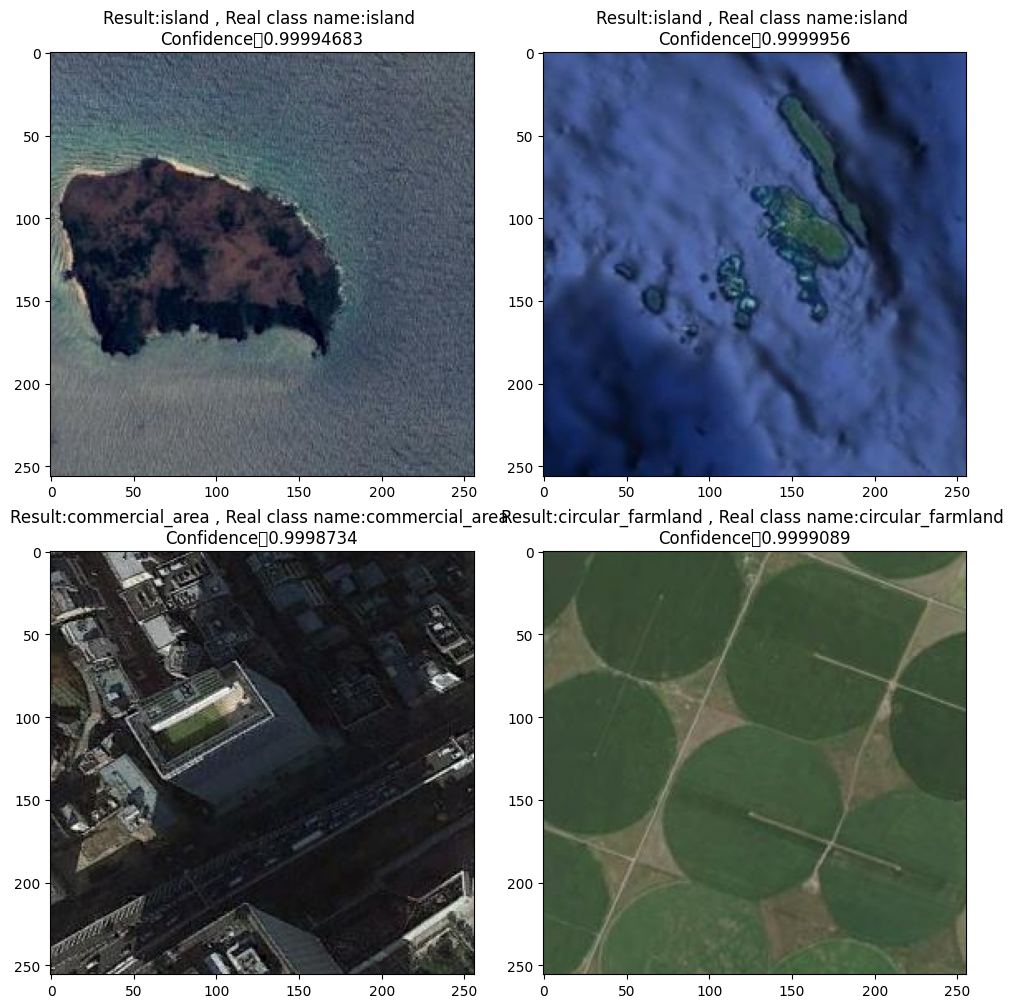

In [ ]:
testset_dir = 'data/test/NWPU45'
weight_path = 'result/model-weight-ep-625-val_loss-0.3092-val_acc-0.9551.h5'
model = LCNN_BFF(input_shape, num_classes)
model.load_weights(weight_path)

labels = [
    "airplane", "airport", "baseball_diamond", "basketball_court", "beach", "bridge", "chaparral", "church", "circular_farmland",
"cloud", "commercial_area", "dense_residential", "desert", "forest", "freeway", "golf_course", "ground_track_field", "harbor", "industrial_area",
"intersection", "island", "lake", "meadow", "medium_residential", "mobile_home_park", "mountain",  "overpass", "palace", "parking_lot", "railway",
"railway_station", "rectangular_farmland", "river", "roundabout", "runway", "sea_ice", "ship", "snowberg", "sparse_residential", "stadium",
"storage_tank", "tennis_court", "terrace", "thermal_power_station", "wetland"
]

random_img_test(model, labels, testset_dir)

### Predict

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator

input_shape = (256, 256, 3)
num_classes = 45
#Fill in the number of categories of the selected dataset, for example, fill in 45 for NWPU dataset
testset_dir = 'data/test/NWPU45'
weight_path = 'result/model-weight-ep-625-val_loss-0.3092-val_acc-0.9551.h5'
batch_size = 64
model = LCNN_BFF(input_shape, num_classes)
model.load_weights(weight_path)

# Prediction on test set
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    testset_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical', 
    shuffle=False)

for i in range(len(test_generator)):
    x_test, y_test = test_generator.__getitem__(i)
    test_true = np.argmax(y_test, axis=1)
    test_pred = np.argmax(model.predict(x_test), axis=1)
    dataframe = pd.DataFrame({'true_labels':test_true, 'pred_labels':test_pred}, columns=['true_labels', 'pred_labels'])
    if i == 0:
        dataframe.to_csv('predict.csv', sep=',', mode='w', index=False)
    else:
        dataframe.to_csv('predict.csv', sep=',', mode='a', index=False, header=False)

Found 6300 images belonging to 45 classes.
1/1 [==============================] - 1s 1s/step


### Classification

In [ ]:
import pandas as pd 
import seaborn as sn
import numpy as np 
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt

def acc_score(csv_name):
    r_c = pd.read_csv(csv_name)
    true_labels = r_c['true_labels']
    pred_labels = r_c['pred_labels']
    acc = accuracy_score(true_labels, pred_labels)
    return acc

def report(csv_name, labels):
    r_c = pd.read_csv (csv_name)
    true_labels = r_c['true_labels']
    pred_labels = r_c['pred_labels']
    r = classification_report(true_labels, pred_labels, digits=4, target_names=labels)
    return r

def matrix(csv_name, labels):
    r_c = pd.read_csv( csv_name)
    true_labels = r_c['true_labels']
    pred_labels = r_c['pred_labels']
    mat = confusion_matrix(true_labels, pred_labels)
    mat_2 = np.ndarray((len(labels), len(labels)))
    names = []
    for n in range(1, len(labels)+1):
        name = str(n) + '#'
        names.append(name)

    for i in range(len(labels)):
        for k in range(len(labels)):
            mat_2[i][k] = mat[i][k] / np.sum(mat[i])

    mat_2 = np.round(mat_2, decimals=2)
    sn.heatmap(mat_2, annot=True, fmt='.2f', cmap='gray_r', xticklabels=names, yticklabels=labels,
            mask=mat_2<0.001, annot_kws={'size':8})
    plt.yticks(rotation=360)
    plt.show()

def plt_acc(csv_name2):
    r_c = pd.read_csv(csv_name2)
    acc = r_c['acc']
    val_acc = r_c['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'blue', label='train_acc', marker='', linestyle='-')
    plt.plot(epochs, val_acc, 'red', label='test_acc', marker='.', linestyle='-')
    plt.title('Train and Test Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plt_loss(csv_name2):
    r_c = pd.read_csv(csv_name2)
    loss = r_c['loss']
    val_loss = r_c['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'blue', label='train_loss', marker='', linestyle='-')
    plt.plot(epochs, val_loss, 'red', label='test_loss', marker='.', linestyle='-')
    plt.title('Train and Test Loss')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
acc_score("predict.csv")

0.9550793650793651

In [ ]:
report("predict.csv", labels)

'                       precision    recall  f1-score   support\n\n             airplane     1.0000    0.9786    0.9892       140\n              airport     0.9496    0.9429    0.9462       140\n     baseball_diamond     0.9856    0.9786    0.9821       140\n     basketball_court     0.9789    0.9929    0.9858       140\n                beach     0.9714    0.9714    0.9714       140\n               bridge     0.9504    0.9571    0.9537       140\n            chaparral     0.9722    1.0000    0.9859       140\n               church     0.8857    0.8857    0.8857       140\n    circular_farmland     0.9929    1.0000    0.9964       140\n                cloud     0.9928    0.9786    0.9856       140\n      commercial_area     0.9593    0.8429    0.8973       140\n    dense_residential     0.9254    0.8857    0.9051       140\n               desert     0.9781    0.9571    0.9675       140\n               forest     0.9783    0.9643    0.9712       140\n              freeway     0.9635    0

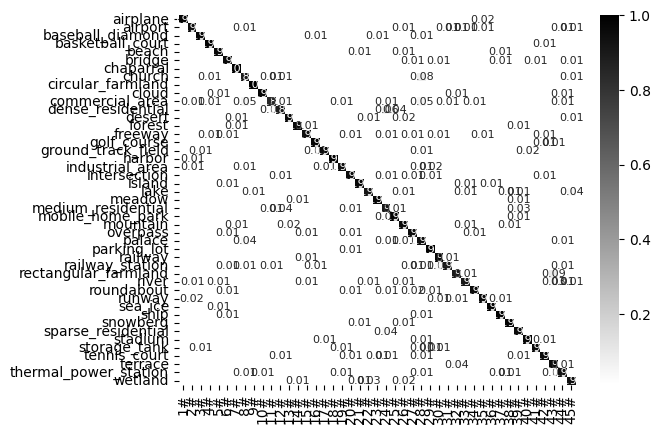

In [ ]:
matrix("predict.csv", labels)

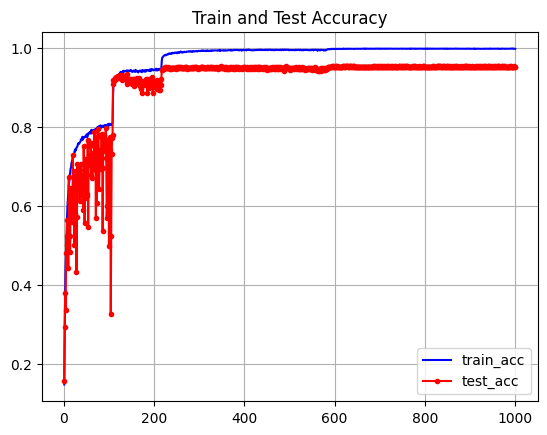

In [ ]:
plt_acc("./result/XXX.csv")

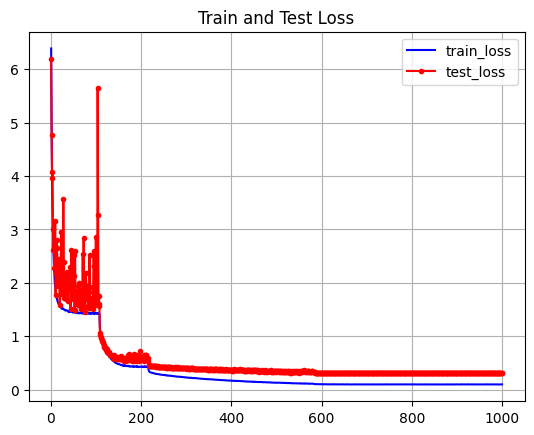

In [ ]:
plt_loss("./result/XXX.csv")

### Feature Map

Found 31500 images belonging to 45 classes.
2/2 [==============================] - 0s 45ms/step


2/2 [==============================] - 0s 131ms/step


2/2 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 190ms/step


IndexError: index 12 is out of bounds for axis 0 with size 12

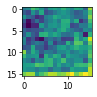

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
# import cv2
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

input_shape = (256, 256, 3)
num_classes = 45
batch_size = 64
data_path = 'original_data/NWPU45/'
class_names = os.listdir(data_path)
# print(class_names)
image_paths = []
for c_name in class_names:
    class_path = data_path + c_name + '/'
    image_name = os.listdir(class_path)
    for i in range(len(image_name)):
        image_name[i] = class_path + image_name[i]
        image_paths.append(image_name[i])
# print(image_paths)
for c_name in class_names:
    save = 'feature_map/BFF/' + c_name + '/'
    if not os.path.exists(save):
        os.makedirs(save)

weights_path = 'result/model-weight-ep-625-val_loss-0.3092-val_acc-0.9551.h5'
model = LCNN_BFF(input_shape, num_classes)
model.load_weights(weights_path)
#The fourth group, the first branch-36, the second branch-37, bff-38, channel = 128
conv_layer = Model(inputs=model.inputs, outputs=model.get_layer(index=38).output)

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    data_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical', 
    shuffle=False)

c = 0
for i in range(len(test_generator)):
    x_test, y_test = test_generator.__getitem__(i)
    conv_output = conv_layer.predict(x_test)
    for j in range(batch_size):
        total_feature_map = conv_output[j, :, :, 0]
        for k in range(1, 128):
            single_feature_maps = conv_output[j, :, :, k]
            total_feature_map = total_feature_map + single_feature_maps

        plt.figure(num=1, figsize=(2, 1.5), dpi=60, clear=True)
        plt.imshow(total_feature_map)

        save_path = 'feature_map/BFF/' + image_paths[c][21:-3] + 'png'
        plt.savefig(save_path)
        c = c + 1